# collect data set

In [71]:
# import the data set
import pandas as pd
dataset= pd.read_csv("Exploring Text Data\\tweets.csv",encoding='ISO-8859-1')
dataset.head(5)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


# Generating Word Frequency

In [72]:
def gen_freq(text):
    # store the list of words
    word_list = []
    
    #loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)
    
    # crate word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    # print top 20 word frequency
    word_freq[:20]
    return word_freq

gen_freq(dataset['text'].str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

In [73]:
dataset['text'][0].split()

['RT',
 '@rssurjewala:',
 'Critical',
 'question:',
 'Was',
 'PayTM',
 'informed',
 'about',
 '#Demonetization',
 'edict',
 'by',
 'PM?',
 "It's",
 'clearly',
 'fishy',
 'and',
 'requires',
 'full',
 'disclosure',
 '&amp;']

# EDA using word clouds

<function matplotlib.pyplot.show(close=None, block=None)>

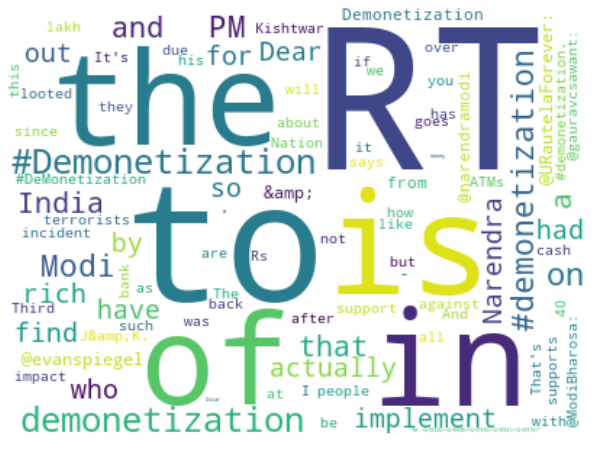

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

 #generate word clouud
wc = WordCloud(width=400,height=300,max_words=100,background_color='white').generate_from_frequencies(gen_freq(dataset['text'].str))
 
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off') 
plt.show

Analysist the result is :
- RT and & amp is noise -> can be removed
- Stop word is many there like "the", "in","of","a","to",etc, are not be represent the people tweet just construct a english language
- the word like demonetization is multiple times and the text is not normalization with morpohne methode (normalizaiton, lemmitazion)

# Text Cleaning

In [75]:
import re

def clean_text(text):
    #remove rt
    re.sub(r"RT","",text)
    
    #fix &
    text= re.sub(r"&amp","&",text)
    
    #remove punctuation
    text = re.sub(r"[?!.;:#@-]","",text)
    
    #convert to lowercase
    text = text.lower()
    return text

In [76]:
from wordcloud import STOPWORDS
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

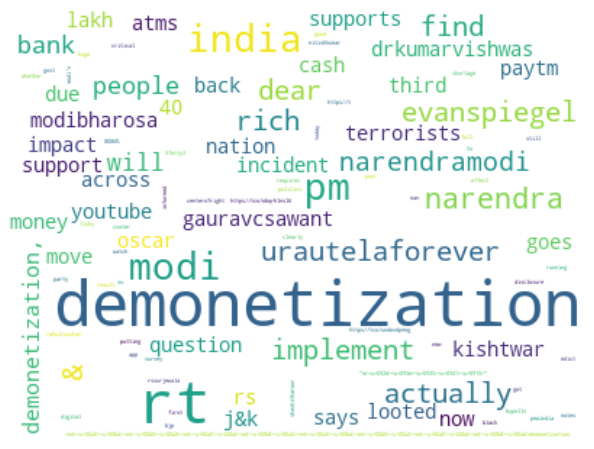

In [77]:
text  = dataset['text'].apply(lambda x : clean_text(x))
word_freq = gen_freq(text.str)*100 #*100 lebih ke standarisasi scale
word_freq = word_freq.drop(labels=STOPWORDS,errors='ignore') # detelete the stopwords

#generate the stop words
wc = WordCloud(width=400,height=300,max_words=100,background_color='white').generate_from_frequencies(word_freq)
 
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off') 
plt.show()

In [78]:
#normalization stemmer
from nltk.stem.porter import PorterStemmer
data =[]
ps = PorterStemmer()
for i in text :
    data.append(ps.stem(i))


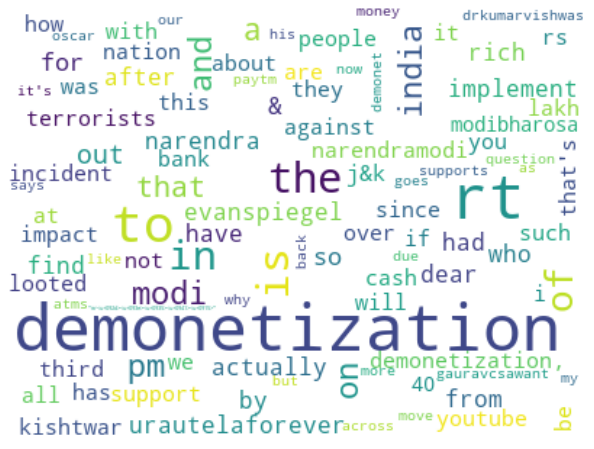

In [82]:

data = pd.Series(data)
word_freq = gen_freq(data.str)*100

# generate wordcloud
wc = WordCloud(width=400,height=300,max_words=100,background_color='white').generate_from_frequencies(word_freq)
 
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off') 
plt.show()

# Part of tagging and grammar passing
- define the sintesis content dan aturan dari sentence words

- common pos tags : nouns , verbs, adjev, adverb

- sentence : David has purchased a new laptop from apple store

- Didefinisika oleh relasi dengan kata yang bersebelahan

-  ML atau rule berbasiskan proses

Uses :
- text cleaning
- feature engineering
- word sense disambigunition

example :

sentence 1 : Please book my flight for newyork

sentence 2 : i like to read a book on newyork

book -> on sentence 1 is verb and sentence 2 is noun.

Contitusi grammar

Sentence : << subject >> << context >> << object >>

depedency grammar

- named entitas recognition
- question answering system
- coreference resolution
- text classification
- text summarization
